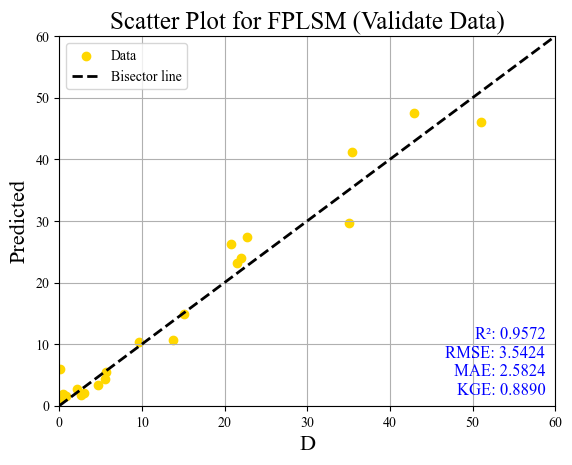

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Replace with the actual file path
file_path = 'C:\\Users\\HP\\Desktop\\Zayande rood.xlsx'

# Specify the sheet name
sheet_name = 'P'

# Read the Excel file into a pandas DataFrame for the specified sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the features (2nd to 7th columns) and the target variable (12th column)
X_original = df.iloc[:, 1:7].values  # Original features
y = df.iloc[:, 11].values   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the features (important for FPLSM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fuzzy logic membership functions
def create_membership_functions(data, num_clusters=3):
    membership_functions = []
    for i in range(data.shape[1]):
        centroids = np.linspace(data[:, i].min(), data[:, i].max(), num_clusters)
        membership_functions.append(centroids)
    return membership_functions

# Create fuzzy membership functions
membership_functions = create_membership_functions(X_train_scaled)

# Fuzzify the input data
def fuzzify_data(data, membership_functions):
    fuzzy_data = []
    for i in range(data.shape[1]):
        fuzzy_data.append(np.array([np.exp(-(point[i] - centroid)**2) for point in data for centroid in membership_functions[i]]).reshape(-1, len(membership_functions[i])))
    return np.hstack(fuzzy_data)

X_train_fuzzy = fuzzify_data(X_train_scaled, membership_functions)
X_test_fuzzy = fuzzify_data(X_test_scaled, membership_functions)

# Least squares optimization
def least_squares_optimization(X, y):
    weights = np.linalg.lstsq(X, y, rcond=None)[0]
    return weights

# Train the FPLSM model
weights = least_squares_optimization(X_train_fuzzy, y_train)

# Make predictions on the test set
y_pred = np.dot(X_test_fuzzy, weights)

# Calculate evaluation metrics
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Calculate Kling-Gupta Efficiency (KGE)
mean_observed = np.mean(y_test)
mean_simulated = np.mean(y_pred)
std_observed = np.std(y_test)
std_simulated = np.std(y_pred)
correlation = np.corrcoef(y_test, y_pred)[0, 1]

kge = 1 - np.sqrt((correlation - 1)**2 + (std_simulated/std_observed - 1)**2 + (mean_simulated/mean_observed - 1)**2)

# Scatter plot for all data points
plt.scatter(y_test, y_pred, color='gold', label='Data')

# Fit a linear regression line
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot([0, 60], [0, 60], linestyle='--', color='black', linewidth=2, label='Bisector line')

# Set the limits to start from 0 and remove space after 60
plt.xlim(0, 60)
plt.ylim(0, 60)

plt.title('Scatter Plot for FPLSM (Validate Data)', fontsize=18)
plt.xlabel('D', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.grid(True)

# Add legend
plt.legend(loc='upper left')

# Display evaluation metrics
text_message = f'R²: {r_squared:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nKGE: {kge:.4f}'
plt.text(0.98, 0.02, text_message, transform=plt.gca().transAxes, fontsize=12, color='blue', ha='right', va='bottom')

plt.show()


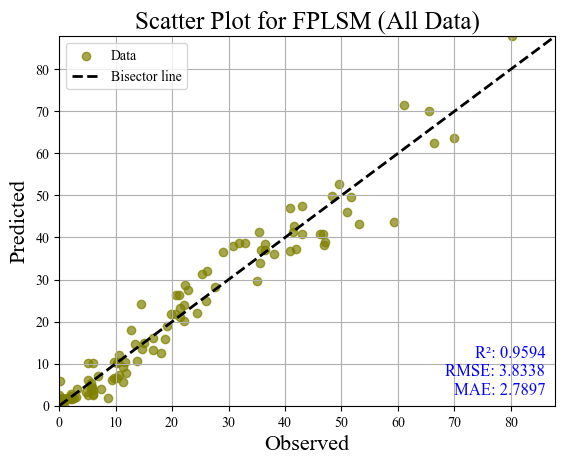

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Replace with the actual file path
file_path = 'C:\\Users\\HP\\Desktop\\Zayande rood.xlsx'

# Specify the sheet name
sheet_name = 'P'

# Read the Excel file into a pandas DataFrame for the specified sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the features (2nd to 7th columns) and the target variable (12th column)
X_original = df.iloc[:, 1:7].values  # Original features
y = df.iloc[:, 11].values   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the features (important for FPLSM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fuzzy logic membership functions
def create_membership_functions(data, num_clusters=3):
    membership_functions = []
    for i in range(data.shape[1]):
        centroids = np.linspace(data[:, i].min(), data[:, i].max(), num_clusters)
        membership_functions.append(centroids)
    return membership_functions

# Create fuzzy membership functions
membership_functions = create_membership_functions(X_train_scaled)

# Fuzzify the input data
def fuzzify_data(data, membership_functions):
    fuzzy_data = []
    for i in range(data.shape[1]):
        fuzzy_data.append(np.array([np.exp(-(point[i] - centroid)**2) for point in data for centroid in membership_functions[i]]).reshape(-1, len(membership_functions[i])))
    return np.hstack(fuzzy_data)

X_train_fuzzy = fuzzify_data(X_train_scaled, membership_functions)
X_test_fuzzy = fuzzify_data(X_test_scaled, membership_functions)

# Least squares optimization
def least_squares_optimization(X, y):
    weights = np.linalg.lstsq(X, y, rcond=None)[0]
    return weights

# Train the FPLSM model
weights = least_squares_optimization(X_train_fuzzy, y_train)

# Make predictions on the test set
y_pred = np.dot(X_test_fuzzy, weights)

# Combine the original and predicted values for both training and testing sets
y_combined = np.concatenate([y_train, y_test])
y_pred_combined = np.concatenate([np.dot(X_train_fuzzy, weights), y_pred])

# Calculate evaluation metrics
r_squared = r2_score(y_combined, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_combined, y_pred_combined))
mae = mean_absolute_error(y_combined, y_pred_combined)

# Display evaluation metrics
text_message = f'R²: {r_squared:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}'
plt.text(0.98, 0.02, text_message, transform=plt.gca().transAxes, fontsize=12, color='blue', ha='right', va='bottom')

# Scatter plot for all data points
plt.scatter(y_combined, y_pred_combined, color='olive', label='Combined Actual vs. Predicted', alpha=0.7)

# Set the limits for both axes without space before zero values
min_val_combined = min(min(y_combined), min(y_pred_combined))
max_val_combined = max(max(y_combined), max(y_pred_combined))
plt.xlim(min_val_combined, max_val_combined)
plt.ylim(min_val_combined, max_val_combined)

plt.plot([min_val_combined, max_val_combined], [min_val_combined, max_val_combined], linestyle='--', color='black', linewidth=2, label='Bisector line')

plt.title('Scatter Plot for FPLSM (All Data)', fontsize=18)
plt.xlabel('Observed', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# Replace with the actual file path
file_path = 'C:\\Users\\HP\\Desktop\\Zayande rood.xlsx'

# Specify the sheet name
sheet_name = 'P'

# Read the Excel file into a pandas DataFrame for the specified sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the features (2nd to 7th columns) and the target variable (12th column)
X_original = df.iloc[:, 1:7].values  # Original features
y = df.iloc[:, 11].values   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Fit a linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg_model.predict(X_test)



# Set consistent y-axis range for all subplots
y_min = min(y_test.min(), y_pred_linear.min())
y_max = max(y_test.max(), y_pred_linear.max())

# Set prediction interval width (adjust as needed)
prediction_interval_width = 1.96  # 95% prediction interval

# Define a list of colors for scatter plots
point_colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']



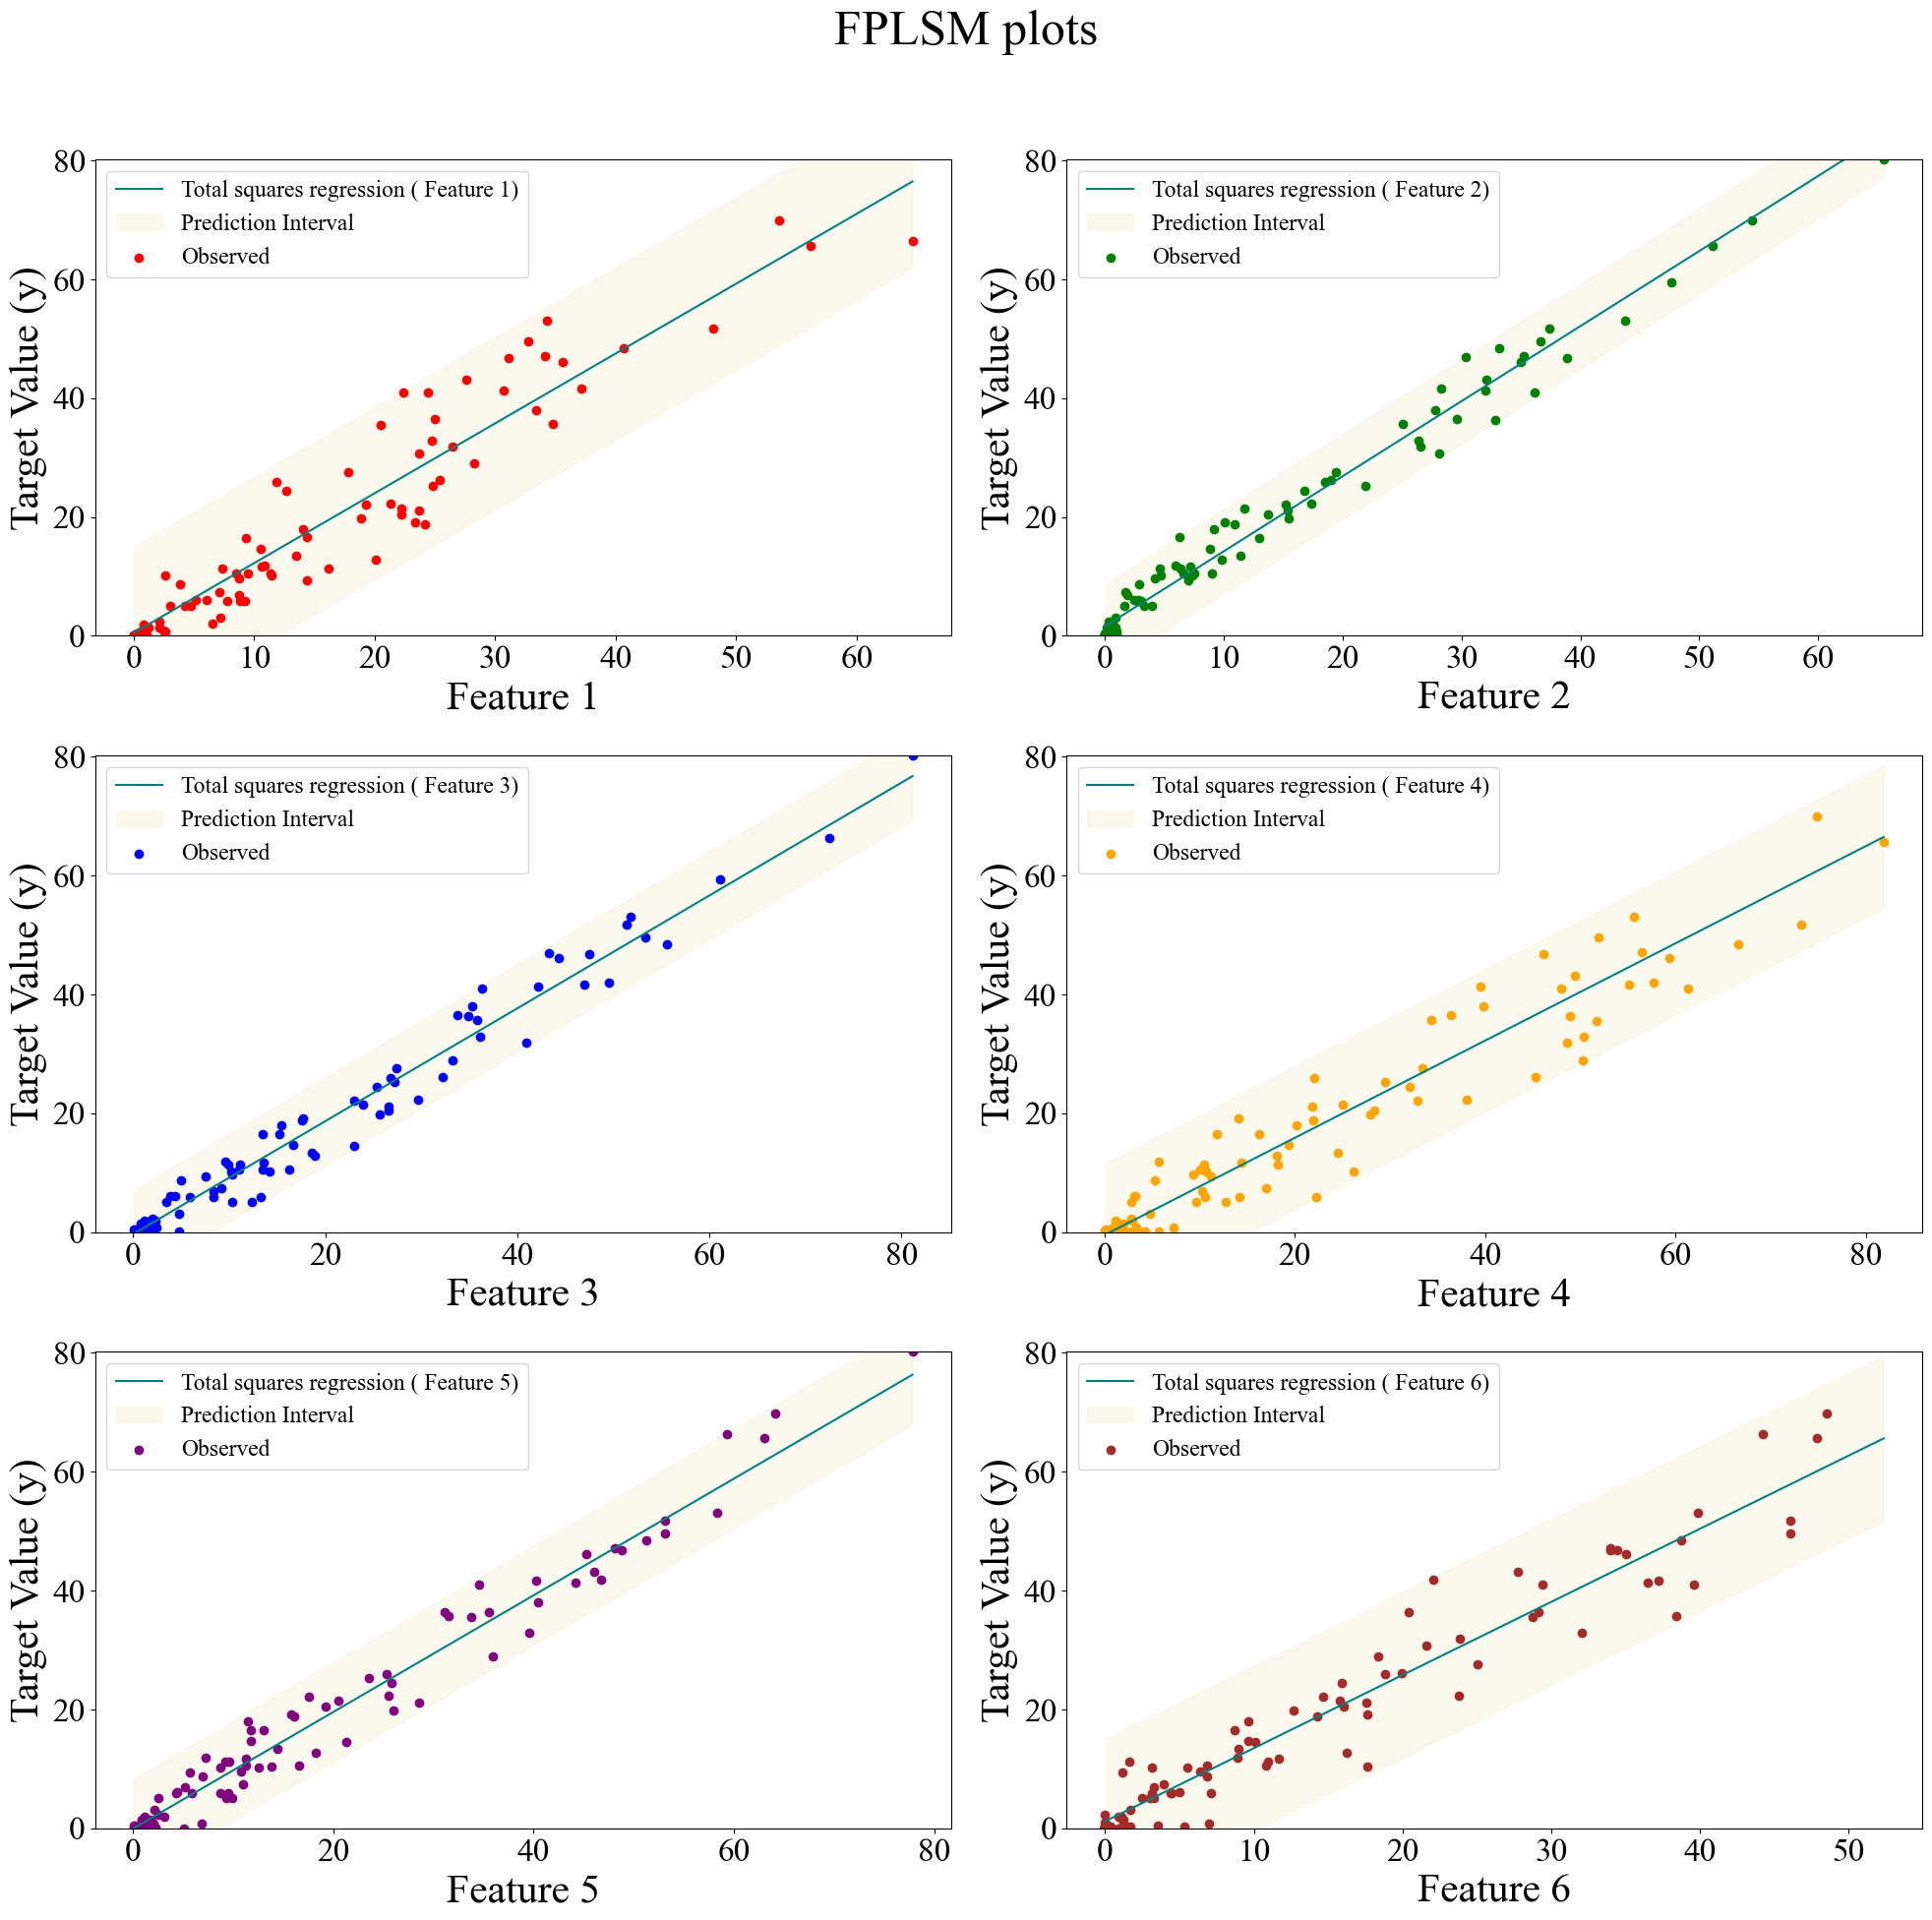

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming you have X_train, X_test, y_train, y_test defined

# Set up subplots for combined data with 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle('FPLSM plots', fontsize=36)  # Increase title font size

# Define a new order for subplots with 3 rows and 2 columns
subplot_order = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]

# Set consistent y-axis range for all subplots
y_min = min(y_train.min(), y_test.min())
y_max = max(y_train.max(), y_test.max())

# Set prediction interval width (adjust as needed)
prediction_interval_width = 1.96  # 95% prediction interval

# Define a list of colors for scatter plots
point_colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

# Plot each feature in a separate subplot in the specified order
for i, (row, col) in enumerate(subplot_order):
    # Plot for combined data
    ax = axs[row, col]

    x_range_linear_train = np.linspace(X_train[:, i].min(), X_train[:, i].max(), 100).reshape(-1, 1)
    x_range_linear_test = np.linspace(X_test[:, i].min(), X_test[:, i].max(), 100).reshape(-1, 1)

    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_train[:, [i]], y_train)

    # Plot for training data
    y_range_pred_linear_train = linear_reg_model.predict(x_range_linear_train)
    ax.plot(x_range_linear_train, y_range_pred_linear_train, color='teal', label=f'Total squares regression ( Feature {i+1})')

    prediction_interval_train = prediction_interval_width * np.std(y_train - linear_reg_model.predict(X_train[:, [i]]))
    ax.fill_between(x_range_linear_train.flatten(), y_range_pred_linear_train - prediction_interval_train, y_range_pred_linear_train + prediction_interval_train, color='beige', alpha=0.5, label='Prediction Interval')

    mask_train = (y_train >= (linear_reg_model.predict(X_train[:, [i]]) - prediction_interval_train)) & (y_train <= (linear_reg_model.predict(X_train[:, [i]]) + prediction_interval_train))
    
    # Plot points without error bars
    ax.scatter(X_train[mask_train, i], y_train[mask_train], color=point_colors[i], label='Observed', marker='o', zorder=1)

    # Plot for testing data without regression line
    mask_test = (y_test >= (linear_reg_model.predict(X_test[:, [i]]))) & (y_test <= (linear_reg_model.predict(X_test[:, [i]])))
    ax.scatter(X_test[mask_test, i], y_test[mask_test], color=point_colors[i], marker='o', zorder=1)

    ax.set_xlabel(f'Feature {i+1}', fontsize=30)  # Increase x-axis label font size
    ax.set_ylabel('Target Value (y)', fontsize=30)  # Increase y-axis label font size
    ax.legend(fontsize=17)  # Increase legend font size
    ax.tick_params(axis='both', labelsize=24)  # Increase tick label font size
    ax.set_ylim(y_min, y_max)

# Adjust layout for combined data
plt.tight_layout(rect=[0, 0, 1, 0.96], pad=2)
plt.show()
